Problem Statement
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study
You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


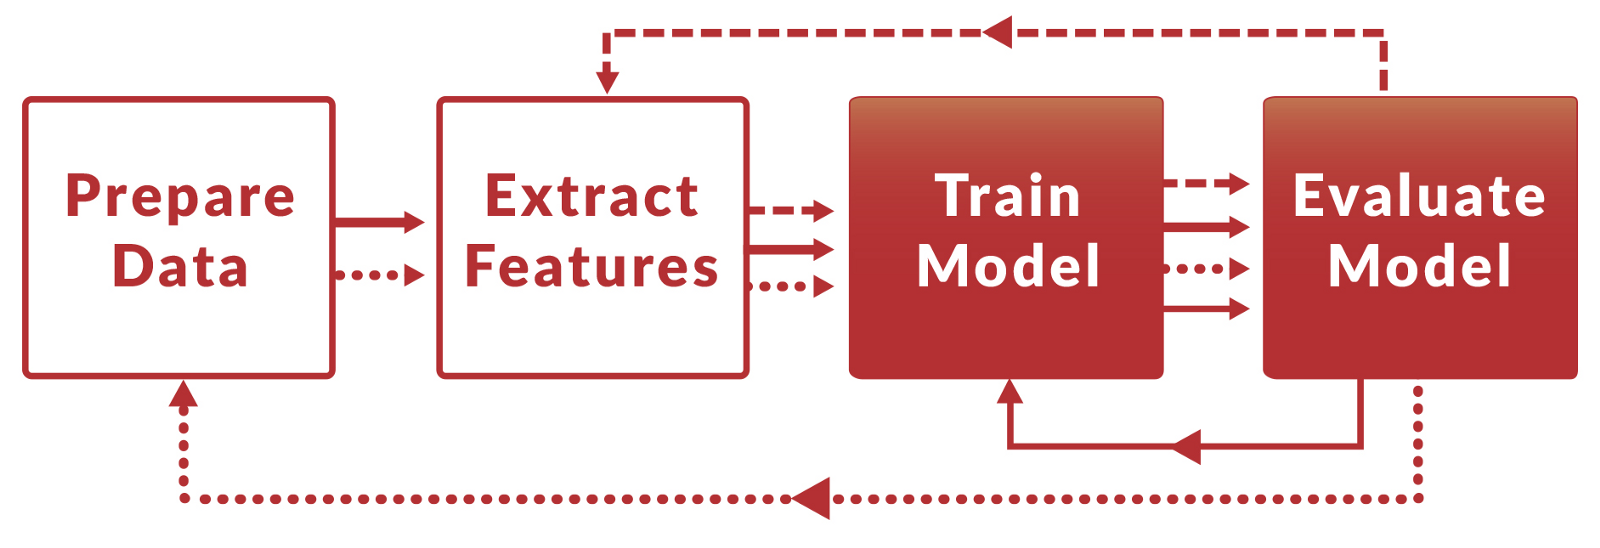

In [3]:
import numpy as np
import pandas as pd
import os
print(os.listdir("D:/ML Data/Day 1/"))

['2296_3883_bundle_archive.zip', '2296_3883_bundle_archive_zip.rar', '42363_72602_bundle_archive.zip', 'data_dictionary.xlsx', 'employee_survey_data.csv', 'Features data set.csv', 'general_data.csv', 'in_time.csv', 'manager_survey_data.csv', 'out_time.csv', 'sales data-set.csv', 'stores data-set.csv']


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
# "%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, "
import seaborn as sns
sns.set()  # Apply the default default seaborn theme, scaling, and color palette.


In [6]:
data = pd.read_csv("D:/ML Data/Day 1/general_data.csv",sep=",")

In [7]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [10]:
data.shape

(4410, 24)

In [11]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [12]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [13]:
#data Cleaning
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [14]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [15]:
data.fillna(0,inplace =True)

In [16]:
data.isnull().any()    # No Null value

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [17]:
data.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1,inplace=True)

In [18]:
# Data Visualization 
#Find the correlation b/w all the columns

corr_cols = data[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

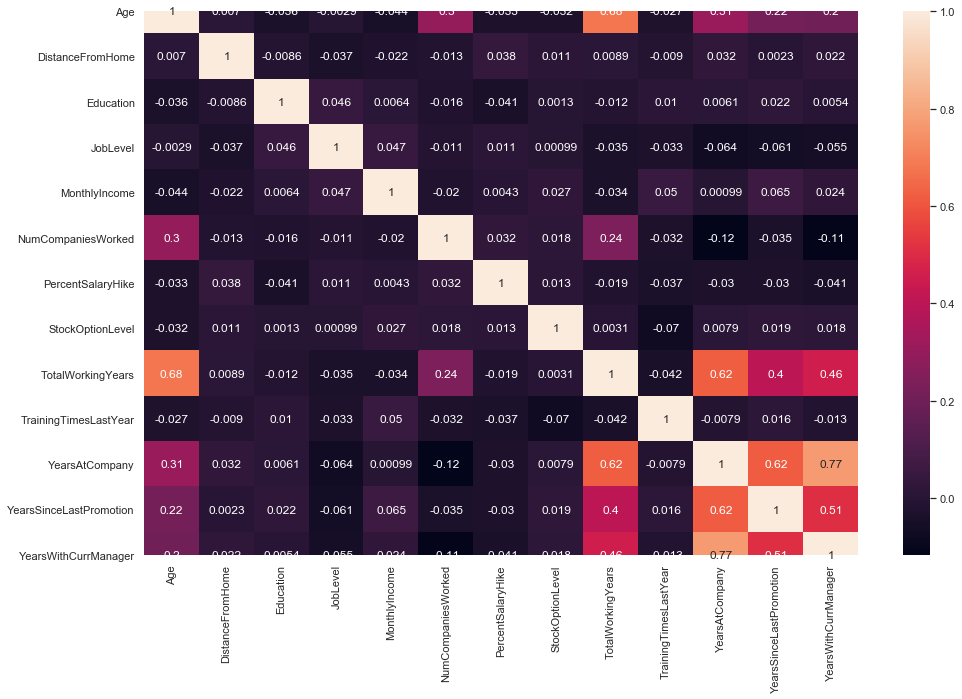

In [20]:
corr = corr_cols.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)
plt.show()

In [21]:
print(len(data))
print(len(data[data['Attrition']=='Yes']))
print(len(data[data['Attrition']=='No']))
print("percentage of yes Attrition is:",(len(data[data['Attrition']=='Yes'])/len(data))*100,"%")
print("percentage of no Attrition is:",(len(data[data['Attrition']=='No'])/len(data))*100,"%")

4410
711
3699
percentage of yes Attrition is: 16.122448979591837 %
percentage of no Attrition is: 83.87755102040816 %


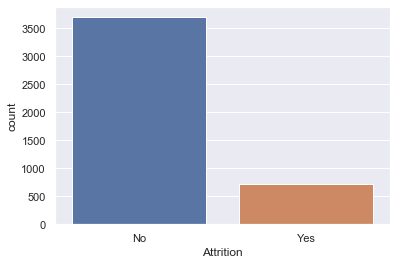

In [23]:
sns.countplot(x = "Attrition",data=data)
plt.show()


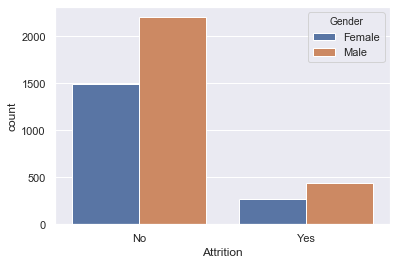

In [24]:
sns.countplot(x = "Attrition",data=data,hue="Gender")
plt.show()

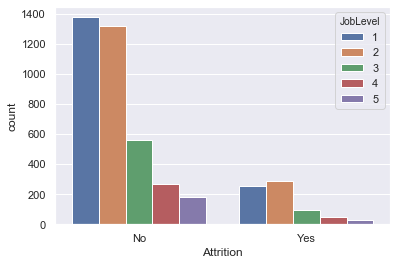

In [25]:
sns.countplot(x = "Attrition",data=data,hue="JobLevel")
plt.show()

In [26]:
#function to creat group of ages, this helps because we have 78 differente values here
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(data); 

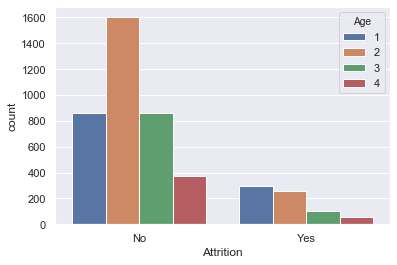

In [27]:
sns.countplot(x = "Attrition",data=data,hue="Age")
plt.show()

In [28]:
#Convert all the Categorical data into numerical data
print(data['BusinessTravel'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['Department'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())
print(data['Over18'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales' 'Research & Development' 'Human Resources']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['Y']


In [30]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
data['BusinessTravel'] = labelEncoder_X.fit_transform(data['BusinessTravel'])
data['Department'] = labelEncoder_X.fit_transform(data['Department'])
data['EducationField'] = labelEncoder_X.fit_transform(data['EducationField'])
data['Gender'] = labelEncoder_X.fit_transform(data['Gender'])
data['JobRole'] = labelEncoder_X.fit_transform(data['JobRole'])
data['MaritalStatus'] = labelEncoder_X.fit_transform(data['MaritalStatus'])
data['Over18'] = labelEncoder_X.fit_transform(data['Over18'])

In [31]:
#Attriton is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
data['Attrition']=label_encoder_y.fit_transform(data['Attrition'])

In [32]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,0,2,2,6,2,1,0,1,0,...,131160,1.0,0,11,0,1.0,6,1,0,0
1,2,1,1,1,10,1,1,0,1,6,...,41890,0.0,0,23,1,6.0,3,5,1,4
2,2,0,1,1,17,4,4,1,4,7,...,193280,1.0,0,15,3,5.0,2,5,0,3
3,2,0,0,1,2,5,1,1,3,1,...,83210,3.0,0,11,3,13.0,5,8,7,5
4,2,0,2,1,10,1,3,1,1,7,...,23420,4.0,0,12,2,9.0,2,6,0,4


In [38]:
corr_cols = data[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

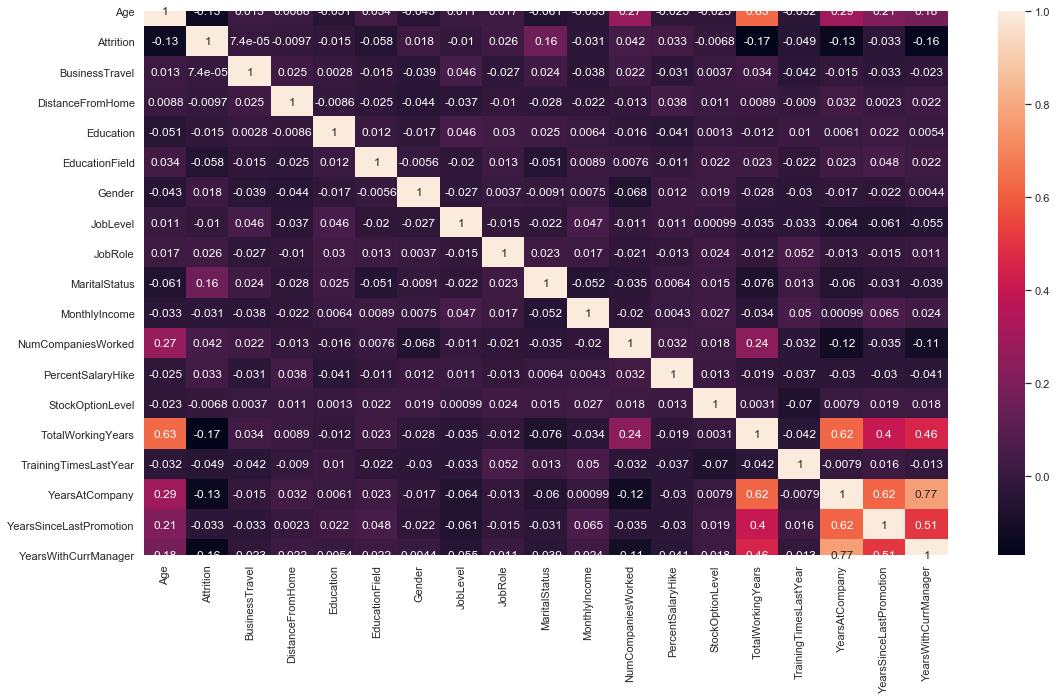

In [39]:
corr = corr_cols.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

In [40]:
#Split data into training and Testing set:
#Choose dependent and independent var:
#here dependent var is Attrition and rest of the var are indepdent var.

y = data['Attrition']
x = data.drop('Attrition', axis = 1)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [44]:
#import some comman libs:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8378684807256236
[[732   9]
 [134   7]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       741
           1       0.44      0.05      0.09       141

    accuracy                           0.84       882
   macro avg       0.64      0.52      0.50       882
weighted avg       0.78      0.84      0.78       882

